<a href="https://colab.research.google.com/github/ianimeshjain/Exploratory_data_analysis_Fake_Job/blob/main/Fake_Job_Preiction_Exploratory_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [ ]:
df = pd.read_csv('fake_job_postings.csv')

In [ ]:
df.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


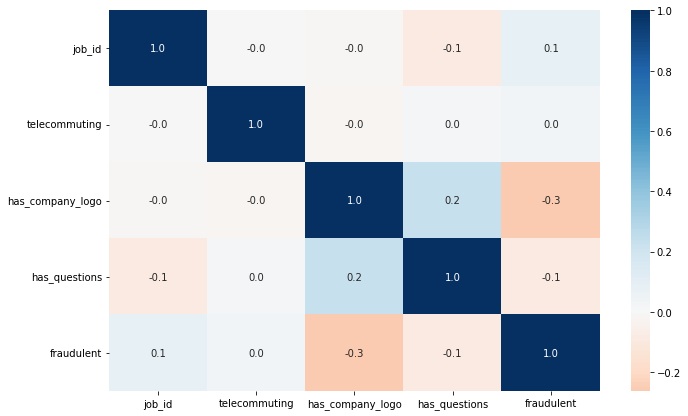

In [ ]:
corr = df.corr()
fig, ax = plt.subplots()
fig.set_size_inches(11, 7)
sns.heatmap(corr, annot=True, fmt=".1f", cmap="RdBu", center=0, ax=ax)

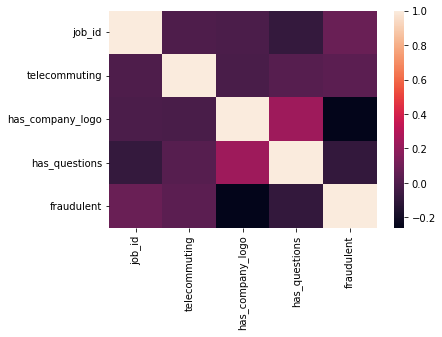

In [ ]:
sns.heatmap(corr)

In [ ]:
df.shape

(17880, 18)

In [ ]:
df.isnull().sum()

job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2695
benefits                7210
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64

In [ ]:
df.isnull().any()

job_id                 False
title                  False
location                True
department              True
salary_range            True
company_profile         True
description             True
requirements            True
benefits                True
telecommuting          False
has_company_logo       False
has_questions          False
employment_type         True
required_experience     True
required_education      True
industry                True
function                True
fraudulent             False
dtype: bool

In [ ]:
text_df = df[["title", "company_profile", "description", "requirements", "benefits","fraudulent"]]

In [ ]:
text_df.head()

,title,company_profile,description,requirements,benefits,fraudulent
0,Marketing Intern,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0
1,Customer Service - Cloud Video Production,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0
2,Commissioning Machinery Assistant (CMA),Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0
3,Account Executive - Washington DC,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0
4,Bill Review Manager,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0


In [ ]:
text_df.isnull().any()

title              False
company_profile     True
description         True
requirements        True
benefits            True
fraudulent         False
dtype: bool

In [ ]:
#cleaning text fields and filling space in text fields
text_df = text_df.fillna(' ')
text_df.head()

,title,company_profile,description,requirements,benefits,fraudulent
0,Marketing Intern,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,,0
1,Customer Service - Cloud Video Production,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0
2,Commissioning Machinery Assistant (CMA),Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,,0
3,Account Executive - Washington DC,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0
4,Bill Review Manager,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0


In [ ]:
#checking again if there is any null value
text_df.isnull().any()

title              False
company_profile    False
description        False
requirements       False
benefits           False
fraudulent         False
dtype: bool

In [ ]:
cat_df = df[["telecommuting", "has_company_logo", "has_questions", "employment_type", "required_experience", "required_education", "industry", "function","fraudulent"]]


In [ ]:
cat_df = cat_df.fillna("None")


In [ ]:
cat_df.head()

,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,0,1,0,Other,Internship,None,None,Marketing,0
1,0,1,0,Full-time,Not Applicable,None,Marketing and Advertising,Customer Service,0
2,0,1,0,None,None,None,None,None,0
3,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [ ]:
cat_df.isnull().any()

telecommuting          False
has_company_logo       False
has_questions          False
employment_type        False
required_experience    False
required_education     False
industry               False
function               False
fraudulent             False
dtype: bool

In [ ]:
#dropping columns from main data frame
df.drop(['salary_range','job_id'], axis = 1, inplace = True)

In [ ]:
df.isnull().any()

title                  False
location                True
department              True
company_profile         True
description             True
requirements            True
benefits                True
telecommuting          False
has_company_logo       False
has_questions          False
employment_type         True
required_experience     True
required_education      True
industry                True
function                True
fraudulent             False
dtype: bool

In [ ]:
df.fillna(" ",inplace = True)

In [ ]:
df.isnull().any()

title                  False
location               False
department             False
company_profile        False
description            False
requirements           False
benefits               False
telecommuting          False
has_company_logo       False
has_questions          False
employment_type        False
required_experience    False
required_education     False
industry               False
function               False
fraudulent             False
dtype: bool

In [ ]:
df['text'] = df['title'] + ' ' + df['location'] + ' ' + df['department'] + ' ' + df['company_profile'] + ' ' + df['requirements'] + ' ' + df['employment_type'] + ' ' + df['industry']

In [ ]:
df.text[0]

"Marketing Intern US, NY, New York Marketing We're Food52, and we've created a groundbreaking and award-winning cooking site. We support, connect, and celebrate home cooks, and give them everything they need in one place.We have a top editorial, business, and engineering team. We're focused on using technology to find new and better ways to connect people around their specific food interests, and to offer them superb, highly curated information about food and cooking. We attract the most talented home cooks and contributors in the country; we also publish well-known professionals like Mario Batali, Gwyneth Paltrow, and Danny Meyer. And we have partnerships with Whole Foods Market and Random House.Food52 has been named the best food website by the James Beard Foundation and IACP, and has been featured in the New York Times, NPR, Pando Daily, TechCrunch, and on the Today Show.We're located in Chelsea, in New York City. Experience with content management systems a major plus (any blogging

In [ ]:
df.drop(['title','location','department','company_profile','description','requirements','benefits','employment_type','required_experience','required_education','industry','function'], axis = 1, inplace = True)

In [ ]:
df.head()

,telecommuting,has_company_logo,has_questions,fraudulent,text
0,0,1,0,0,"Marketing Intern US, NY, New York Marketing We..."
1,0,1,0,0,"Customer Service - Cloud Video Production NZ, ..."
2,0,1,0,0,"Commissioning Machinery Assistant (CMA) US, IA..."
3,0,1,0,0,"Account Executive - Washington DC US, DC, Wash..."
4,0,1,1,0,"Bill Review Manager US, FL, Fort Worth SpotS..."


In [ ]:
df['text_length'] = df.text.apply(len)
df.head()

,telecommuting,has_company_logo,has_questions,fraudulent,text,text_length
0,0,1,0,0,"Marketing Intern US, NY, New York Marketing We...",1790
1,0,1,0,0,"Customer Service - Cloud Video Production NZ, ...",2821
2,0,1,0,0,"Commissioning Machinery Assistant (CMA) US, IA...",2303
3,0,1,0,0,"Account Executive - Washington DC US, DC, Wash...",2131
4,0,1,1,0,"Bill Review Manager US, FL, Fort Worth SpotS...",2460


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Target Count')

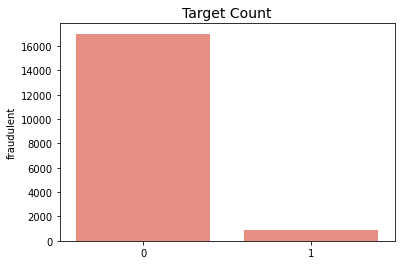

In [ ]:
fraud = df["fraudulent"].value_counts()
sns.barplot(fraud.index, fraud, color="salmon")
plt.title('Target Count', fontsize=14)

In [ ]:
type(fraud)

pandas.core.series.Series

In [ ]:
fraud

0    17014
1      866
Name: fraudulent, dtype: int64

Text(0.5, 0, 'Text Length')

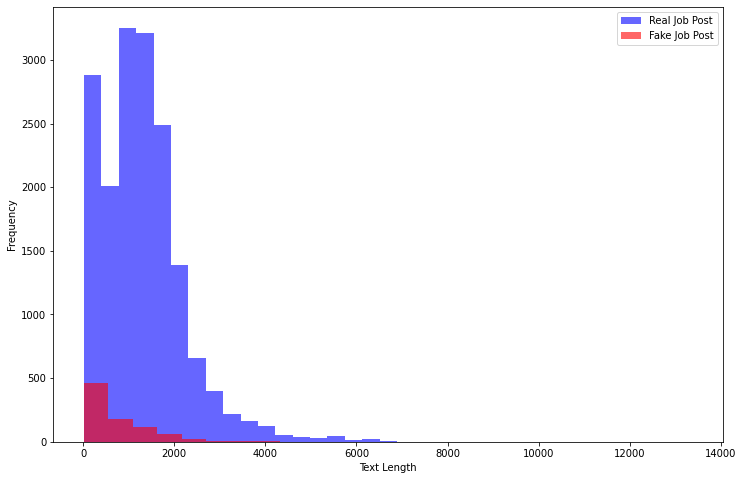

In [ ]:
plt.figure(figsize=(12, 8))

df[df.fraudulent==0].text_length.plot(bins=35, kind='hist', color='blue', 
                                       label='Real Job Post', alpha=0.6)
df[df.fraudulent==1].text_length.plot(kind='hist', color='red', 
                                       label='Fake Job Post', alpha=0.6)
plt.legend()
plt.xlabel("Text Length")

In [ ]:
text_df.head()
text_df .drop(['description','benefits'], axis = 1, inplace = True)

In [ ]:
text_df.head()

,title,company_profile,requirements,fraudulent
0,Marketing Intern,"We're Food52, and we've created a groundbreaki...",Experience with content management systems a m...,0
1,Customer Service - Cloud Video Production,"90 Seconds, the worlds Cloud Video Production ...",What we expect from you:Your key responsibilit...,0
2,Commissioning Machinery Assistant (CMA),Valor Services provides Workforce Solutions th...,Implement pre-commissioning and commissioning ...,0
3,Account Executive - Washington DC,Our passion for improving quality of life thro...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",0
4,Bill Review Manager,SpotSource Solutions LLC is a Global Human Cap...,QUALIFICATIONS:RN license in the State of Texa...,0


In [ ]:
cat_df.head()
cat_df.drop(['required_education','function'], axis = 1, inplace = True)

In [ ]:
cat_df.head()

,telecommuting,has_company_logo,has_questions,employment_type,required_experience,industry,fraudulent
0,0,1,0,Other,Internship,None,0
1,0,1,0,Full-time,Not Applicable,Marketing and Advertising,0
2,0,1,0,None,None,None,0
3,0,1,0,Full-time,Mid-Senior level,Computer Software,0
4,0,1,1,Full-time,Mid-Senior level,Hospital & Health Care,0


In [ ]:
text_df.head()

,title,company_profile,requirements,fraudulent
0,Marketing Intern,"We're Food52, and we've created a groundbreaki...",Experience with content management systems a m...,0
1,Customer Service - Cloud Video Production,"90 Seconds, the worlds Cloud Video Production ...",What we expect from you:Your key responsibilit...,0
2,Commissioning Machinery Assistant (CMA),Valor Services provides Workforce Solutions th...,Implement pre-commissioning and commissioning ...,0
3,Account Executive - Washington DC,Our passion for improving quality of life thro...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",0
4,Bill Review Manager,SpotSource Solutions LLC is a Global Human Cap...,QUALIFICATIONS:RN license in the State of Texa...,0


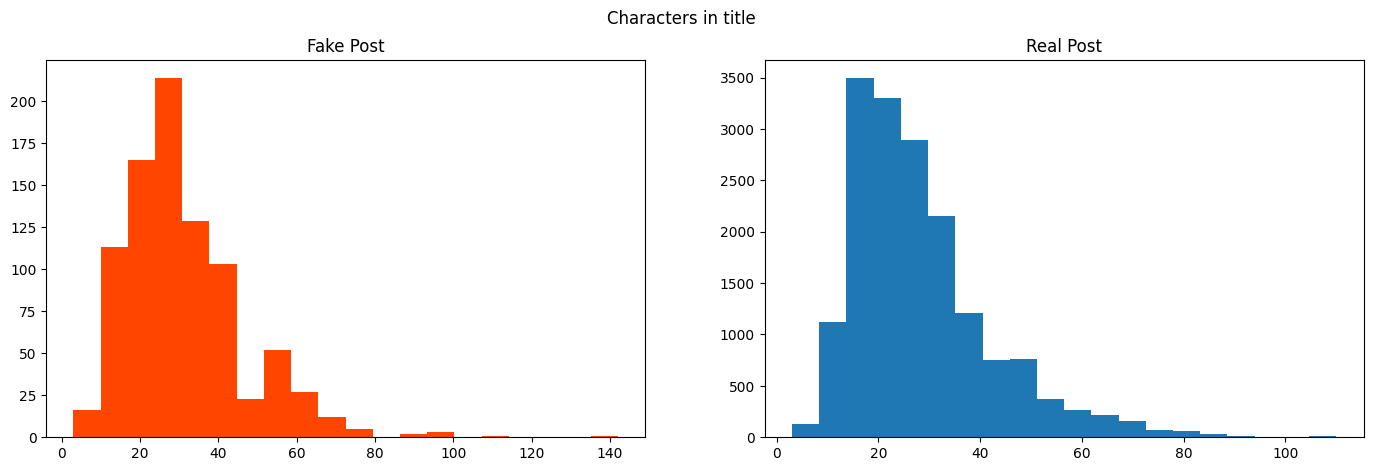

In [ ]:
# number of characters comparision by plotting in title field
fig,(ax1,ax2)= plt.subplots(ncols=2, figsize=(17, 5), dpi=100)
length=text_df[text_df["fraudulent"]==1]['title'].str.len()
ax1.hist(length,bins = 20,color='orangered')
ax1.set_title('Fake Post')
length=text_df[text_df["fraudulent"]==0]['title'].str.len()
ax2.hist(length, bins = 20)
ax2.set_title('Real Post')
fig.suptitle('Characters in title ')
plt.show()

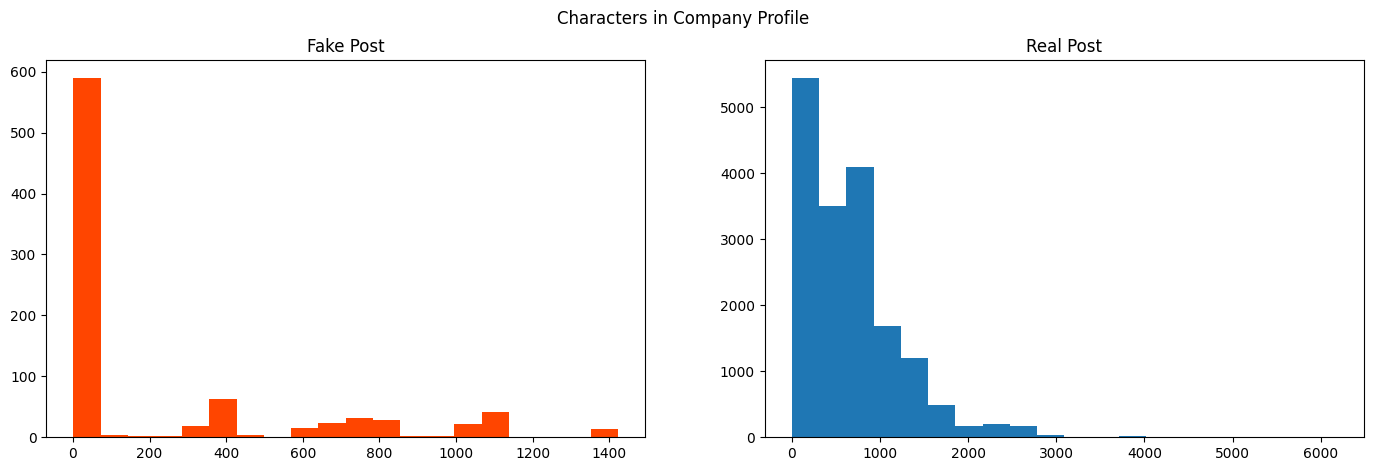

In [ ]:
# number of characters comparision by plotting in company Profile field
fig,(ax1,ax2)= plt.subplots(ncols=2, figsize=(17, 5), dpi=100)
length=text_df[text_df["fraudulent"]==1]['company_profile'].str.len()
ax1.hist(length,bins = 20,color='orangered')
ax1.set_title('Fake Post')
length=text_df[text_df["fraudulent"]==0]['company_profile'].str.len()
ax2.hist(length, bins = 20)
ax2.set_title('Real Post')
fig.suptitle('Characters in Company Profile')
plt.show()

In [ ]:
# from above figure see that fake job have less number of characters as compared to real jobs

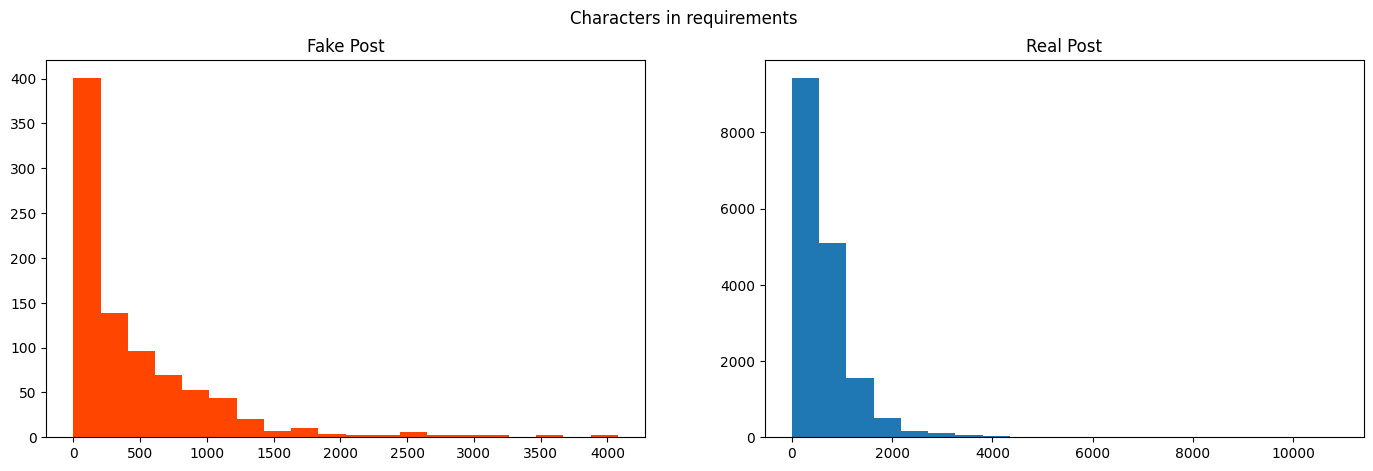

In [ ]:

# number of characters comparision by plotting in requirement field
fig,(ax1,ax2)= plt.subplots(ncols=2, figsize=(17, 5), dpi=100)
length=text_df[text_df["fraudulent"]==1]['requirements'].str.len()
ax1.hist(length,bins = 20,color='orangered')
ax1.set_title('Fake Post')
length=text_df[text_df["fraudulent"]==0]['requirements'].str.len()
ax2.hist(length, bins = 20)
ax2.set_title('Real Post')
fig.suptitle('Characters in requirements')
plt.show()

In [ ]:
# from above figure see that similar pattern in the graph but real jobs is reaching above 6000 characters

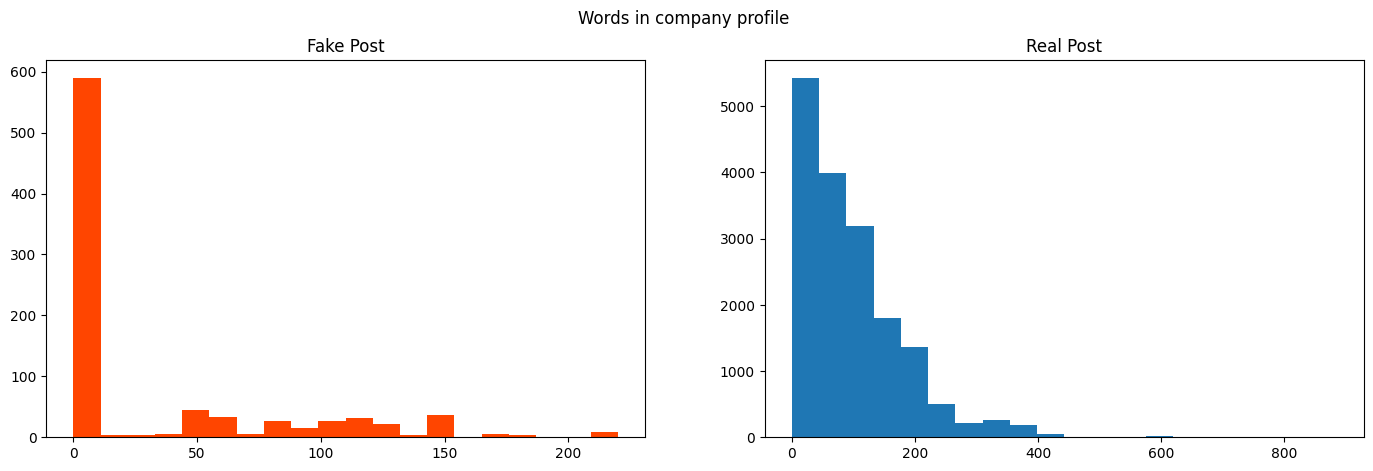

In [ ]:
# number of words comparision by plotting in company_profile field(using split function to create a list of words and counting the words)
fig,(ax1,ax2)= plt.subplots(ncols=2, figsize=(17, 5), dpi=100)
num=text_df[text_df["fraudulent"]==1]['company_profile'].str.split().map(lambda x: len(x))
ax1.hist(num,bins = 20,color='orangered')
ax1.set_title('Fake Post')
num=text_df[text_df["fraudulent"]==0]['company_profile'].str.split().map(lambda x: len(x))
ax2.hist(num, bins = 20)
ax2.set_title('Real Post')
fig.suptitle('Words in company profile')
plt.show()

In [ ]:
#Pattern of words in company profile is same as character in company profile. fake post has less words in the company profile while real post has more words

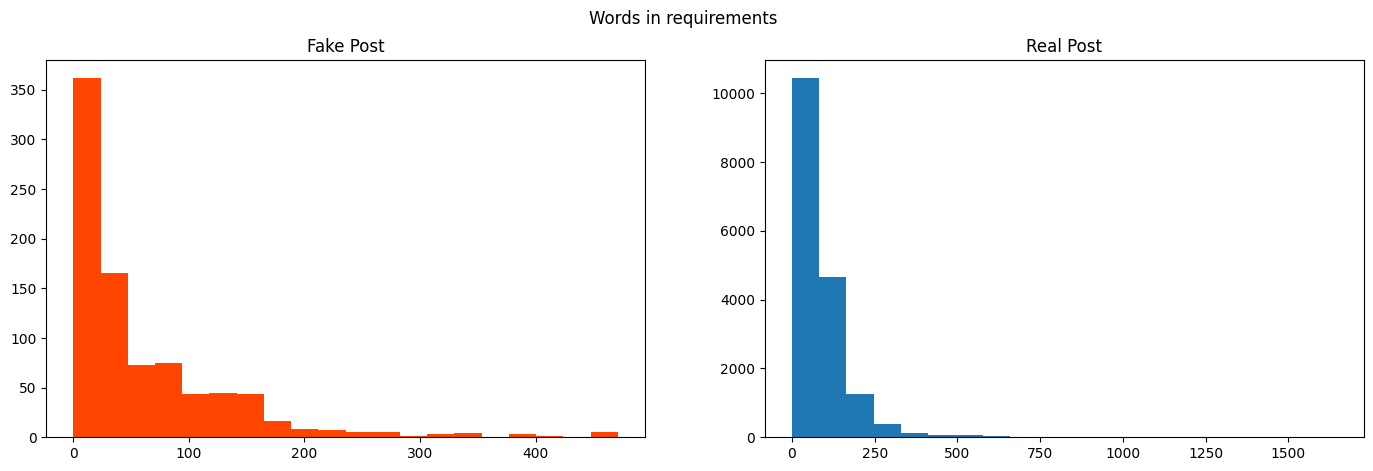

In [ ]:
# number of words comparision by plotting in requirements field(using split function to create a list of words and counting the words)
fig,(ax1,ax2)= plt.subplots(ncols=2, figsize=(17, 5), dpi=100)
num=text_df[text_df["fraudulent"]==1]['requirements'].str.split().map(lambda x: len(x))
ax1.hist(num,bins = 20,color='orangered')
ax1.set_title('Fake Post')
num=text_df[text_df["fraudulent"]==0]['requirements'].str.split().map(lambda x: len(x))
ax2.hist(num, bins = 20)
ax2.set_title('Real Post')
fig.suptitle('Words in requirements')
plt.show()

In [ ]:
#pattern is same in requirements

In [ ]:
df.head()

,telecommuting,has_company_logo,has_questions,fraudulent,text,text_length
0,0,1,0,0,"Marketing Intern US, NY, New York Marketing We...",1790
1,0,1,0,0,"Customer Service - Cloud Video Production NZ, ...",2821
2,0,1,0,0,"Commissioning Machinery Assistant (CMA) US, IA...",2303
3,0,1,0,0,"Account Executive - Washington DC US, DC, Wash...",2131
4,0,1,1,0,"Bill Review Manager US, FL, Fort Worth SpotS...",2460


In [ ]:
regdf = pd.read_csv('fake_job_postings.csv')

regdf.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [ ]:
regdf.drop(['job_id','title','location','department','salary_range','company_profile','description','requirements','benefits','industry','function'], axis = 1, inplace = True)

In [ ]:
regdf.head()

,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,fraudulent
0,0,1,0,Other,Internship,NaN,0
1,0,1,0,Full-time,Not Applicable,NaN,0
2,0,1,0,NaN,NaN,NaN,0
3,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,0
4,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,0
